<a href="https://colab.research.google.com/github/konrad-l/questionnaire/blob/main/Egipt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import plotly.express as px
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
df_raw = pd.read_excel('egipt_zmiana.xlsx', index_col=0)
df = df_raw.copy()
df = df.drop(['wrazenia'], axis=1)
df.head()

,ankietowany,zrodlo,powod,interesujaca,strona,polecenie,odwiedzenie,plec,wyksztalcenie,wiek,zamieszkanie
0,1.0,"Przyjaciele, znajomi, rodzina",Przyjechałam/em specjalnie na tę wystawę,Tak,Aranżacja,Tak,Tak,Kobieta,Uczeń,<15,Miasto 100 000 - 500 000
1,2.0,"Przyjaciele, znajomi, rodzina",Przyjechałam/em specjalnie na tę wystawę,Tak,Aranżacja,Tak,Tak,Kobieta,Uczeń,15-20,Miasto 100 000 - 500 000
2,NaN,"Plakaty, bilbordy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Od mileny,Przyjechałam/em specjalnie na tę wystawę,Tak,Same eksponaty,Tak,NaN,Kobieta,Uczeń,21-30,Miasto 100 000 - 500 000
4,4.0,"Przyjaciele, znajomi, rodzina",Przyjechałam/em specjalnie na tę wystawę,Tak,Same eksponaty,Tak,Tak,Kobieta,Wyższe,41-50,Miasto 100 000 - 500 000


In [ ]:
df.describe(include=[object]).T

,count,unique,top,freq
zrodlo,358,32,Internet,105
powod,302,3,Przyjechałam/em specjalnie na tę wystawę,252
interesujaca,304,4,Tak,287
strona,474,16,Same eksponaty,129
polecenie,302,4,Tak,267
odwiedzenie,265,4,Tak,214
plec,261,3,Kobieta,182
wyksztalcenie,261,4,Wyższe,143
wiek,261,7,21-30,77
zamieszkanie,258,6,Miasto 100 000 - 500 000,108


In [ ]:
# df = df.reset_index(drop=True)

In [ ]:
# zmiana danych typu 'object' na 'category'
for col in ['zrodlo', 'powod', 'interesujaca', 'strona', 'polecenie', 'odwiedzenie', 
            'plec', 'wyksztalcenie', 'wiek', 'zamieszkanie']:
  df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508 entries, 0 to 507
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ankietowany    304 non-null    float64 
 1   zrodlo         358 non-null    category
 2   powod          302 non-null    category
 3   interesujaca   304 non-null    category
 4   strona         474 non-null    category
 5   polecenie      302 non-null    category
 6   odwiedzenie    265 non-null    category
 7   plec           261 non-null    category
 8   wyksztalcenie  261 non-null    category
 9   wiek           261 non-null    category
 10  zamieszkanie   258 non-null    category
dtypes: category(10), float64(1)
memory usage: 16.5 KB


In [ ]:
# zamiana wartosci 'categorical' na 'binarną' (0 lub 1)
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
label.fit_transform(df['polecenie'])

array([2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 4, 4, 2, 4, 0, 4, 2,
       4, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 1, 2,
       2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 1, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4,
       2, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4, 4, 1, 4, 2, 4, 4, 2, 4,
       2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 0, 2, 2, 4, 4, 0, 4,
       2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 0, 0, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2,
       4, 2, 4, 2, 0, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 4,
       4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       2, 4, 4, 2, 2, 4, 4, 4, 0, 2, 2, 2, 2, 4, 2, 3, 2, 4, 4, 2, 1, 4,
       2, 1, 2, 1, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2,
       4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 0, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2,
       1, 4, 0, 2, 0, 2, 2, 4, 4, 4, 2, 4, 1, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 4, 1, 2, 4, 4, 4, 0, 2, 4, 2,

In [ ]:
df['polecenie'] = label.fit_transform(df['polecenie'])

In [ ]:
label.classes_

array(['Nie', 'Nie wiem', 'Tak', 'Zależy komu', nan], dtype=object)

In [ ]:
df['polecenie'].value_counts()

2    267
4    206
0     17
1     17
3      1
Name: polecenie, dtype: int64

In [ ]:
df['odwiedzenie'] = label.fit_transform(df['odwiedzenie'])

In [ ]:
label.classes_

array(['Być może', 'Nie', 'Nie wiem', 'Tak', nan], dtype=object)

In [ ]:
df['odwiedzenie'].value_counts()

4    243
3    214
2     35
1     15
0      1
Name: odwiedzenie, dtype: int64

In [ ]:
df['plec'] = label.fit_transform(df['plec'])

In [ ]:
label.classes_

array(['Kobieta', 'Kobieta/mężczyzna', 'Mężczyzna', nan], dtype=object)

In [ ]:
df['plec'].value_counts()

3    247
0    182
2     78
1      1
Name: plec, dtype: int64

In [ ]:
df['zamieszkanie'] = label.fit_transform(df['zamieszkanie'])

In [ ]:
label.classes_

array(['Miasto 100 000 - 500 000', 'Miasto 50 - 100 000',
       'Miasto do 50 000', 'Miasto powyżej 500 000',
       'Miasto powyżej 500 000 ', 'Wieś', nan], dtype=object)

In [ ]:
df['zrodlo'] = label.fit_transform(df['zrodlo'])

In [ ]:
label.classes_

array(['Facebook', 'Informacja na zamku', 'Informacja turystyczna',
       'Inne', 'Instagram', 'Internet', 'Internet ', 'Konferencja',
       'Nie wiedziałem o tej wystawie', 'Od karoliny fandrejewskiej',
       'Od mamy', 'Od mileny', 'Od rodziców', 'Od siostry', 'Od żony',
       'Plakat przed zamkiem', 'Plakaty, bilbordy',
       'Podczas zwiedzania lublinia', 'Podszedłem pod zamek', 'Prasa',
       'Przechodziliśmy', 'Przechodziłem obok muzeum',
       'Przyjaciele, znajomi, rodzina', 'Radio/tv', 'Strona www mnwl',
       'Szkoła, uczelnia', 'Szukałam wystawy dla dzieci w lublinie',
       'Tik tok', 'Wernisażeria', 'Zauważyłem przechodząc',
       'Łukasz wiącek', 'Żony', nan], dtype=object)

In [ ]:
df['wyksztalcenie'] = label.fit_transform(df['wyksztalcenie'])
label.classes_

array(['Student', 'Uczeń', 'Wyższe', 'Średnie', nan], dtype=object)

In [ ]:
df['wiek'] = label.fit_transform(df['wiek'])
label.classes_

array(['15-20', '21-30', '31-40', '41-50', '51-60', '<15', '>60', nan],
      dtype=object)

In [ ]:
df = pd.get_dummies(df)
df.head()

,ankietowany,zrodlo,polecenie,odwiedzenie,wyksztalcenie,wiek,zamieszkanie,powod_Przy okazji naprawy samochodu,powod_Przy okazji zwiedzania zamku,powod_Przyjechałam/em specjalnie na tę wystawę,...,strona_Mumia,strona_Mumia kota,strona_Nie ma mocnych stron,strona_Rzeka,strona_Same eksponaty,strona_Temat,strona_Światło i dźwiek,plec_Kobieta,plec_Kobieta/mężczyzna,plec_Mężczyzna
0,1.0,22,2,3,1,5,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,2.0,22,2,3,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,NaN,16,4,4,4,7,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,11,2,4,1,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,4.0,22,2,3,2,3,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
df.columns

Index(['ankietowany', 'zrodlo', 'powod', 'interesujaca', 'strona', 'polecenie',
       'odwiedzenie', 'plec', 'wyksztalcenie', 'wiek', 'zamieszkanie'],
      dtype='object')

In [ ]:
tmp = df.groupby(['odwiedzenie'])['plec_Kobieta'].sum()

In [ ]:
odw = pd.DataFrame(tmp)
odw = odw.reset_index()
odw
odw['odwiedzenie'] = ['Być może', 'Nie', 'Nie wiem', 'Tak', 'nan']
odw

,odwiedzenie,plec_Kobieta
0,Być może,0
1,Nie,7
2,Nie wiem,22
3,Tak,151
4,nan,2


In [ ]:
tmp2 = df.groupby(['odwiedzenie'])['plec_Mężczyzna'].sum()
tmp2

odwiedzenie
0     1
1     6
2    10
3    61
4     0
Name: plec_Mężczyzna, dtype: uint8

In [ ]:
odw2 = pd.DataFrame(tmp2)
odw2 = odw2.reset_index()
odw2['odwiedzenie'] = ['Być może', 'Nie', 'Nie wiem', 'Tak', 'nan']
odw2

,odwiedzenie,plec_Mężczyzna
0,Być może,1
1,Nie,6
2,Nie wiem,10
3,Tak,61
4,nan,0


In [ ]:
df_odwiedzanie = pd.concat([odw, odw2.iloc[:,1]], axis=1)
df_odwiedzanie

,odwiedzenie,plec_Kobieta,plec_Mężczyzna
0,Być może,0,1
1,Nie,7,6
2,Nie wiem,22,10
3,Tak,151,61
4,nan,2,0


In [ ]:
df_odwiedzanie.sort_values(by=['plec_Kobieta'], ascending=False)

,odwiedzenie,plec_Kobieta,plec_Mężczyzna
3,Tak,151,61
2,Nie wiem,22,10
1,Nie,7,6
4,nan,2,0
0,Być może,0,1


In [ ]:
df_odwiedzanie.sort_values(by=['plec_Mężczyzna'], ascending=False)

,odwiedzenie,plec_Kobieta,plec_Mężczyzna
3,Tak,151,61
2,Nie wiem,22,10
1,Nie,7,6
0,Być może,0,1
4,nan,2,0


In [ ]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Bar(x=["Tak", "Nie wiem", "Nie", 'Brak odp.', 'Być może'], y=[151, 22, 7, 2, 0], name='Kobieta'), row=1, col=1)

fig.add_trace(go.Bar(x=["Tak", "Nie wiem", "Nie", 'Być może', 'Brak odp.'], y=[61, 10, 6, 1, 0], name='Mężczyzna'),row=1, col=2)

fig.update_layout(height=600, width=1000, title_text="Czy odwiedzi Pani/Pan Muzeum kolejny raz?")
fig.show()

In [ ]:
tmp3 = df.groupby(['zamieszkanie'])['plec_Kobieta'].sum()
tmp3

zamieszkanie
0    73
1    22
2    27
3    32
4     1
5    20
6     7
Name: plec_Kobieta, dtype: uint8

In [ ]:
zam = pd.DataFrame(tmp3)
zam = zam.reset_index()
zam['zamieszkanie'] = ['Miasto 100 000-500 000', 'Miasto 50-100 000', 'Miasto do 50 000', 'Miasto powyżej 500 000',
       'Miasto powyżej 500 000 ', 'Wieś', 'nan']
zam

,zamieszkanie,plec_Kobieta
0,Miasto 100 000-500 000,73
1,Miasto 50-100 000,22
2,Miasto do 50 000,27
3,Miasto powyżej 500 000,32
4,Miasto powyżej 500 000,1
5,Wieś,20
6,nan,7


In [ ]:
zam.sort_values(by=['plec_Kobieta'], ascending=False)

,zamieszkanie,plec_Kobieta
0,Miasto 100 000-500 000,73
3,Miasto powyżej 500 000,32
2,Miasto do 50 000,27
1,Miasto 50-100 000,22
5,Wieś,20
6,nan,7
4,Miasto powyżej 500 000,1


In [ ]:
tmp4 = df.groupby(['zamieszkanie'])['plec_Mężczyzna'].sum()
tmp4

In [ ]:
zam2 = pd.DataFrame(tmp4)
zam2 = zam2.reset_index()
zam2['zamieszkanie'] = ['Miasto 100 000-500 000', 'Miasto 50-100 000', 'Miasto do 50 000', 'Miasto powyżej 500 000',
       'Miasto powyżej 500 000 ', 'Wieś', 'nan']
zam2

,zamieszkanie,plec_Mężczyzna
0,Miasto 100 000-500 000,32
1,Miasto 50-100 000,12
2,Miasto do 50 000,10
3,Miasto powyżej 500 000,14
4,Miasto powyżej 500 000,0
5,Wieś,10
6,nan,0


In [ ]:
zam2.sort_values(by=['plec_Mężczyzna'], ascending=False)

,zamieszkanie,plec_Mężczyzna
0,Miasto 100 000-500 000,32
3,Miasto powyżej 500 000,14
1,Miasto 50-100 000,12
2,Miasto do 50 000,10
5,Wieś,10
4,Miasto powyżej 500 000,0
6,nan,0


In [ ]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Bar(x=['Miasto 100 000-500 000', 'Miasto powyżej 500 000', 'Miasto do 50 000', 'Miasto 50-100 000',
       'Wieś'], y=[73, 33, 27, 22, 20], name='Kobieta'), row=1, col=1)

fig.add_trace(go.Bar(x=['Miasto 100 000-500 000', 'Miasto powyżej 500 000', 'Miasto 50-100 000', 'Miasto do 50 000',
       'Wieś'], y=[32, 14, 12, 10, 10], name='Mężczyzna'), row=1, col=2)

fig.update_layout(height=600, width=1000, title_text="Miejsce zamieszkania")
fig.show()

In [ ]:
tmp5 = df.groupby(['zrodlo'])['plec_Kobieta'].sum()
tmp5

zrodlo
0      1
1      0
2      5
3      2
4      1
5     57
6      0
7      1
8      7
9      0
10     0
11     1
12     0
13     1
14     0
15     0
16    34
17     1
18     0
19     1
20     0
21     0
22    52
23     5
24     0
25     9
26     1
27     1
28     0
29     0
30     0
31     0
32     2
Name: plec_Kobieta, dtype: uint8

In [ ]:
zr = pd.DataFrame(tmp5)
zr = zr.reset_index()
zr['zrodlo'] = ['Facebook', 'Informacja na zamku', 'Informacja turystyczna',
       'Inne', 'Instagram', 'Internet', 'Internet ', 'Konferencja',
       'Nie wiedziałem o tej wystawie', 'Od karoliny fandrejewskiej',
       'Od mamy', 'Od mileny', 'Od rodziców', 'Od siostry', 'Od żony',
       'Plakat przed zamkiem', 'Plakaty, bilbordy',
       'Podczas zwiedzania lublinia', 'Podszedłem pod zamek', 'Prasa',
       'Przechodziliśmy', 'Przechodziłem obok muzeum',
       'Przyjaciele, znajomi, rodzina', 'Radio/tv', 'Strona www mnwl',
       'Szkoła, uczelnia', 'Szukałam wystawy dla dzieci w lublinie',
       'Tik tok', 'Wernisażeria', 'Zauważyłem przechodząc',
       'Łukasz wiącek', 'Żony', 'nan']
zr.head()

,zrodlo,plec_Kobieta
0,Facebook,1
1,Informacja na zamku,0
2,Informacja turystyczna,5
3,Inne,2
4,Instagram,1


In [ ]:
zr_top7 = zr.sort_values(by=['plec_Kobieta'], ascending=False).iloc[:7]
zr_top7

,zrodlo,plec_Kobieta
5,Internet,57
22,"Przyjaciele, znajomi, rodzina",52
16,"Plakaty, bilbordy",34
25,"Szkoła, uczelnia",9
8,Nie wiedziałem o tej wystawie,7
2,Informacja turystyczna,5
23,Radio/tv,5


In [ ]:
tmp6 = df.groupby(['zrodlo'])['plec_Mężczyzna'].sum()

zr2 = pd.DataFrame(tmp6)
zr2 = zr2.reset_index()
zr2['zrodlo'] = ['Facebook', 'Informacja na zamku', 'Informacja turystyczna',
       'Inne', 'Instagram', 'Internet', 'Internet ', 'Konferencja',
       'Nie wiedziałem o tej wystawie', 'Od karoliny fandrejewskiej',
       'Od mamy', 'Od mileny', 'Od rodziców', 'Od siostry', 'Od żony',
       'Plakat przed zamkiem', 'Plakaty, bilbordy',
       'Podczas zwiedzania lublinia', 'Podszedłem pod zamek', 'Prasa',
       'Przechodziliśmy', 'Przechodziłem obok muzeum',
       'Przyjaciele, znajomi, rodzina', 'Radio/tv', 'Strona www mnwl',
       'Szkoła, uczelnia', 'Szukałam wystawy dla dzieci w lublinie',
       'Tik tok', 'Wernisażeria', 'Zauważyłem przechodząc',
       'Łukasz wiącek', 'Żony', 'nan']
zr2.head()

,zrodlo,plec_Mężczyzna
0,Facebook,0
1,Informacja na zamku,0
2,Informacja turystyczna,0
3,Inne,0
4,Instagram,0


In [ ]:
zr_top7 = zr2.sort_values(by=['plec_Mężczyzna'], ascending=False).iloc[:7]
zr_top7

,zrodlo,plec_Mężczyzna
22,"Przyjaciele, znajomi, rodzina",23
5,Internet,20
16,"Plakaty, bilbordy",13
8,Nie wiedziałem o tej wystawie,7
25,"Szkoła, uczelnia",4
23,Radio/tv,2
12,Od rodziców,1


In [ ]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Bar(x=['Internet', 'Przyjaciele, znajomi, rodzina', 'Plakaty, bilbordy', 'Szkoła, uczelnia',
       'Nie wiedziałem o tej wystawie', 'Informacja turystyczna', 'Radio/tv'], y=[57, 52, 34, 9, 7, 5, 5], name='Kobieta'), row=1, col=1)

fig.add_trace(go.Bar(x=['Przyjaciele, znajomi, rodzina', 'Internet', 'Plakaty, bilbordy', 'Nie wiedziałem o tej wystawie',
       'Szkoła, uczelnia', 'Radio/tv', 'Od rodziców'], y=[23, 20, 13, 7, 4, 2, 1], name='Mężczyzna'),row=1, col=2)

fig.update_layout(height=600, width=1000, title_text="Z jakiego źródła dowiedziała się Pani/Pan o wystawie Magia starożytnego Egiptu?")
fig.show()

In [ ]:
tmp7 = df.groupby(['wiek'])['plec_Kobieta'].sum()
tmp7

wiek
0    17
1    53
2    35
3    29
4    16
5    19
6    10
7     3
Name: plec_Kobieta, dtype: uint8

In [ ]:
w = pd.DataFrame(tmp7)
w = w.reset_index()
w['wiek'] = ['15-20', '21-30', '31-40', '41-50', '51-60', '<15', '>60', 'nan']
w.head()

,wiek,plec_Kobieta
0,15-20,17
1,21-30,53
2,31-40,35
3,41-50,29
4,51-60,16


In [ ]:
w.sort_values(by=['plec_Kobieta'], ascending=False)

,wiek,plec_Kobieta
1,21-30,53
2,31-40,35
3,41-50,29
5,<15,19
0,15-20,17
4,51-60,16
6,>60,10
7,nan,3


In [ ]:
tmp8 = df.groupby(['wiek'])['plec_Mężczyzna'].sum()
tmp8

wiek
0     6
1    23
2    21
3     9
4     3
5    12
6     3
7     1
Name: plec_Mężczyzna, dtype: uint8

In [ ]:
w2 = pd.DataFrame(tmp8)
w2 = w2.reset_index()
w2['wiek'] = ['15-20', '21-30', '31-40', '41-50', '51-60', '<15', '>60', 'nan']
w2.head()

,wiek,plec_Mężczyzna
0,15-20,6
1,21-30,23
2,31-40,21
3,41-50,9
4,51-60,3


In [ ]:
w2.sort_values(by=['plec_Mężczyzna'], ascending=False)

,wiek,plec_Mężczyzna
1,21-30,23
2,31-40,21
5,<15,12
3,41-50,9
0,15-20,6
4,51-60,3
6,>60,3
7,nan,1


In [ ]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Bar(x=['21-30', '31-40', '41-50', '<15', '15-20', '51-60', '>60'], 
                     y=[53, 35, 29, 19, 17, 16, 10], name='Kobieta'), row=1, col=1)

fig.add_trace(go.Bar(x=['21-30', '31-40', '<15', '41-50','15-20', '51-60', '>60'], 
                     y=[23, 21, 12, 9, 6, 3, 3], name='Mężczyzna'),row=1, col=2)

fig.update_layout(height=600, width=1000, title_text="Przedział wiekowy")
fig.show()

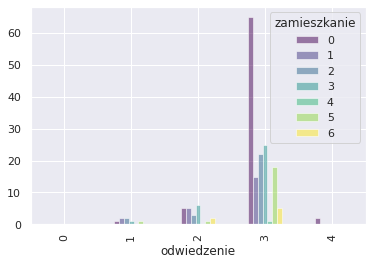

In [ ]:
df.pivot_table(values='plec_Kobieta', index='odwiedzenie', columns='zamieszkanie', 
                 aggfunc='sum').plot(kind='bar', cmap='viridis', alpha=0.5)

In [ ]:
px.histogram(df, x="plec", y="odwiedzenie", facet_col="wyksztalcenie", histfunc='count')
# array(['Student', 'Uczeń', 'Wyższe', 'Średnie', nan], dtype=object)
# wszystkie dane (oprócz 'plec') przekonwertowane na dane binarne przez LabelEncoder

In [ ]:
px.histogram(df, x="plec", y="odwiedzenie", facet_col="wiek", histfunc='count')
# array(['15-20', '21-30', '31-40', '41-50', '51-60', '<15', '>60', nan]

In [ ]:
px.histogram(df, x="plec", y="odwiedzenie", facet_col="zamieszkanie", histfunc='count')
# ['Miasto 100 000 - 500 000', 'Miasto 50 - 100 000', 'Miasto do 50 000', 'Miasto powyżej 500 000','Miasto powyżej 500 000 ', 'Wieś', nan]